# 一般的なニューラルネットワークモデル

In [1]:
# list 3-3-(1) 2次元データの作成

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

np.set_printoptions(precision=3, suppress=True) # 表示を3桁に
plt.rcParams['font.size'] = 14              # フォントサイズを設定
plt.rcParams['figure.figsize'] = (7, 4)     # 図のサイズ指定

n = 100
n_train = 80
noise = 0.2
np.random.seed(1)

# データを作成 (A)
xs = np.random.rand(n, 2) @  np.array([[10, 0], [0, 6]])
ts = np.sin(xs[:, 0]) + np.cos(xs[:, 1]) \
    + noise * np.random.randn(n) + 2

# データを訓練データとテストデータに分ける (B)
xs_train = xs[:n_train, :]
ts_train = ts[:n_train].reshape(-1, 1)
xs_test = xs[n_train:, :]
ts_test = ts[n_train:].reshape(-1, 1)
x_range = ((0, 10), (0, 6))

# データの一部を表示 (C)
print('xs_train=\n', xs_train[:5, :])
print('')
print('ts_train=\n', ts_train[:5, :])

xs_train=
 [[4.17  4.322]
 [0.001 1.814]
 [1.468 0.554]
 [1.863 2.073]
 [3.968 3.233]]

ts_train=
 [[0.778]
 [1.884]
 [3.892]
 [2.613]
 [0.207]]


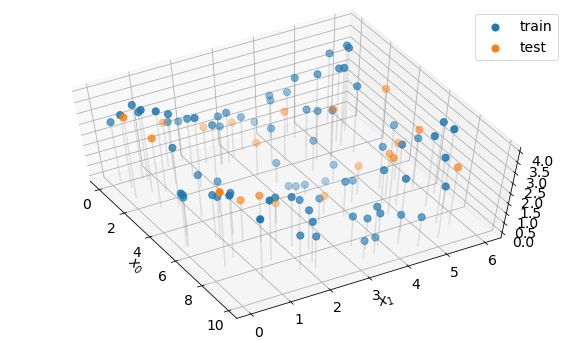

In [2]:
# list 3-3-(2) 2次元データの表示

def show_data2d():
    fig = plt.figure(figsize=(10, 6))
    # 3Dプロット用のグラフを作成
    ax = fig.add_subplot(111, projection='3d')
    # データ点の描画
    ax.scatter(xs_train[:, 0], xs_train[:, 1], ts_train[:, 0], 
        s=50, label='train')
    ax.scatter(xs_test[:, 0], xs_test[:, 1], ts_test[:, 0], 
        s=50, label='test')
    # 点の下の線を描画
    for i in range(len(ts)):
        plt.plot(
            [xs[i, 0], xs[i, 0]],
            [xs[i, 1], xs[i, 1]],
            [0, ts[i]], 'gray', alpha=0.2)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.legend()
    # グラフを見る角度の設定
    ax.view_init(elev=60, azim=-30)
    return ax

show_data2d()
plt.show()

2022-07-27 02:06:04.907469: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-27 02:06:04.909563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/loki/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-07-27 02:06:04.909571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-27 02:06:05.528461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-07-27 02:06:05.5285

train MSE = 0.015
test MSE = 0.046


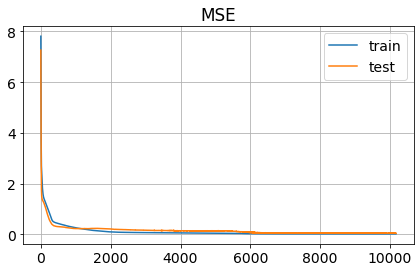

In [3]:
# list 3-3-(3) 2次元入力のニューラルネットワークモデル

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping( # early stopping を定義 (A)
    monitor='val_loss',
    patience=1000,
)

n_batch = len(xs)
# モデル生成 (B)
model = Sequential([
    Dense(32, activation='relu', input_dim=2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mse')
# 学習 (C)
history = model.fit(
    xs_train, ts_train,
    validation_data=(xs_test, ts_test),
    batch_size=n_batch,
    epochs=40000, 
    callbacks=[early_stopping],
    verbose=0)

# 学習曲線表示 (D)
print(f"train MSE = {history.history['loss'][-1]:.3f}")
print(f"test MSE = {history.history['val_loss'][-1]:.3f}")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('MSE')
plt.legend()
plt.grid(axis='both')
plt.plot()
plt.show()

79/79 [==============================] - 0s 484us/step


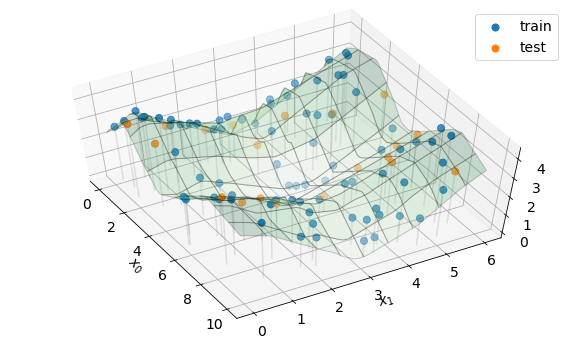

In [4]:
# list 3-3-(4) 2次元入力ニューラルネットワークのフィッティングの表示

# 予測用の格子点の計算 (A)
reso = 50
x0s = np.linspace(x_range[0][0], x_range[0][1], reso)
x1s = np.linspace(x_range[1][0], x_range[1][1], reso)
xx0s, xx1s = np.meshgrid(x0s, x1s)
xxs_pred = np.c_[xx0s.reshape(-1), xx1s.reshape(-1)]

# 予測 (B)
ys_pred = model.predict(xxs_pred)
yys_pred = ys_pred.reshape(xx0s.shape)

# 結果表示 (C)
ax = show_data2d()
ax.plot_surface(xx0s, xx1s, yys_pred,
                cmap='Greens',
                alpha=0.2,
                rstride=5,
                cstride=5,
                edgecolor='k',
                )
ax.view_init(elev=60, azim=-30)
plt.show()